In [1]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# K Means

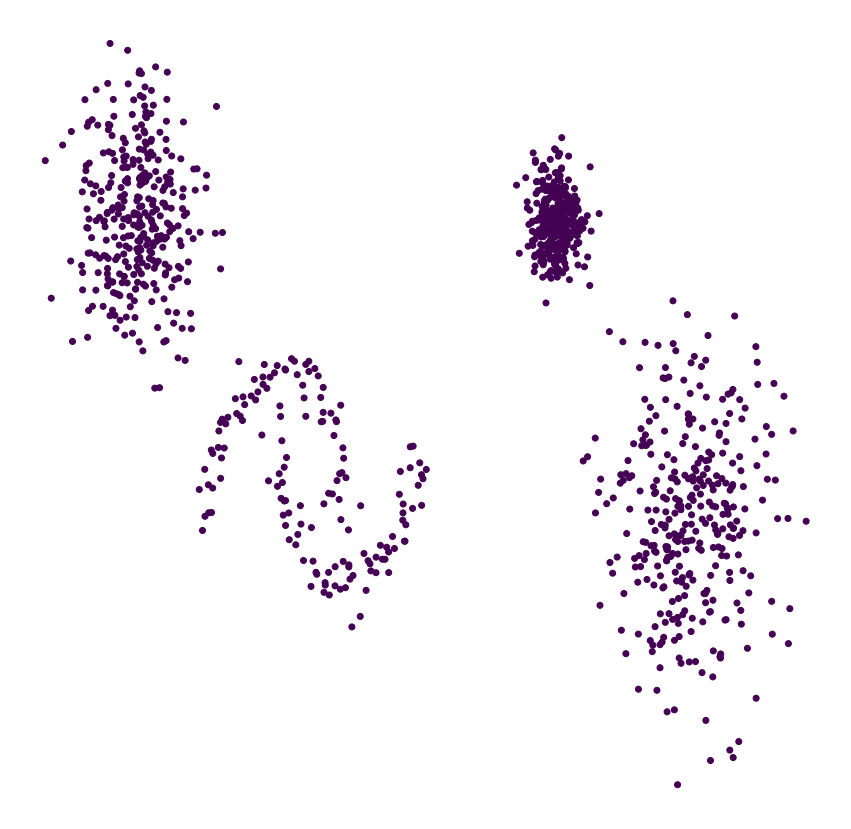

In [2]:
X,y = make_moons(n_samples=150, noise=.1, random_state=0)
X1, y1 = make_blobs(n_samples=1000, centers=[(6,0), (4,2), (-2,2)], n_features=2, random_state=0, shuffle=True,
                  cluster_std=[0.6, 0.2, 0.45])
y1 = y1 + 2
y = np.append(y,y1, axis=0)
X = np.append(X,X1, axis=0)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=np.repeat(0,len(X[:,1])))
plt.axis('off')
plt.savefig('IMAGES/Kmeans-1.png')
plt.show()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from sklearn.metrics import pairwise_distances_argmin


        
def plot_points(X, labels, n_clusters):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                vmin=0, vmax=n_clusters - 1);

def plot_centers(centers):
    plt.scatter(centers[:, 0], centers[:, 1], alpha=0.9,
                c=np.arange(centers.shape[0]),
                s=500, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1],
                c='black', s=50)


def _kmeans_step(frame=0, n_clusters=5):
    fig = plt.figure(figsize=(15,15))
    rng = np.random.RandomState(0)
    labels = np.zeros(X.shape[0])
    centers = rng.randn(n_clusters, 2)

    nsteps = frame // 3

    for i in range(nsteps + 1):
        old_centers = centers
        if i < nsteps or frame % 3 > 0:
            labels = pairwise_distances_argmin(X, centers)

        if i < nsteps or frame % 3 > 1:
            centers = np.array([X[labels == j].mean(0)
                                for j in range(n_clusters)])
            nans = np.isnan(centers)
            centers[nans] = old_centers[nans]

    # plot the data and cluster centers
    plot_points(X, labels, n_clusters)
    plot_centers(old_centers)

    # plot new centers if third frame
    if frame % 3 == 2:
        for i in range(n_clusters):
            plt.annotate('', centers[i], old_centers[i], 
                         arrowprops=dict(arrowstyle='->', linewidth=5, color='black'))
        plot_centers(centers)
    plt.axis('off')
    plt.savefig(f'IMAGES/Kmean{frame}.png')


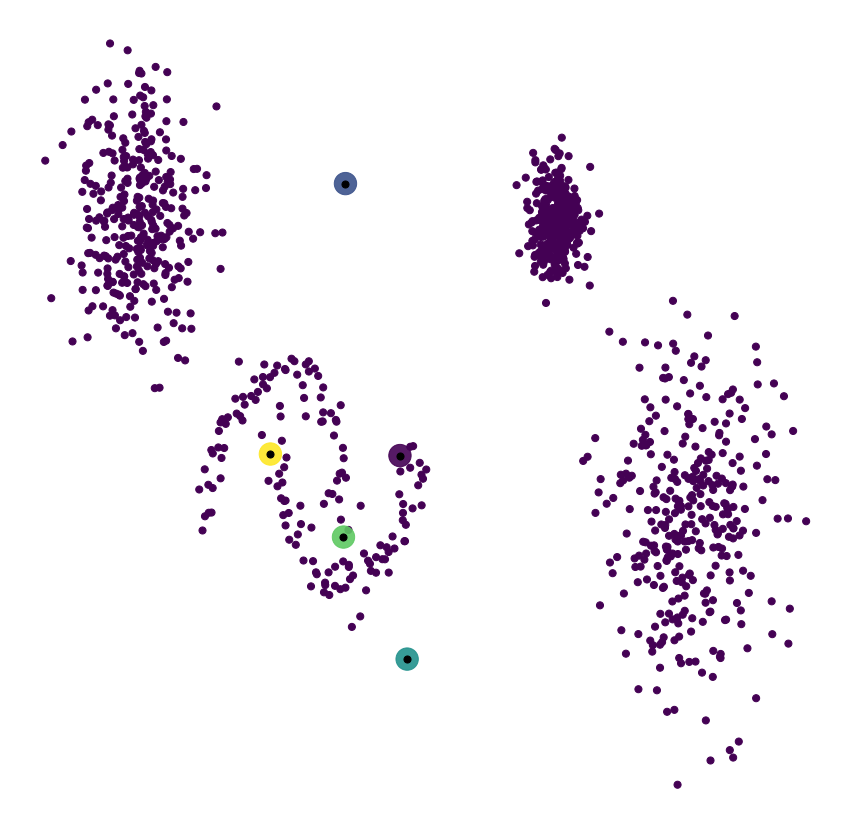

In [4]:
_kmeans_step(0,5)

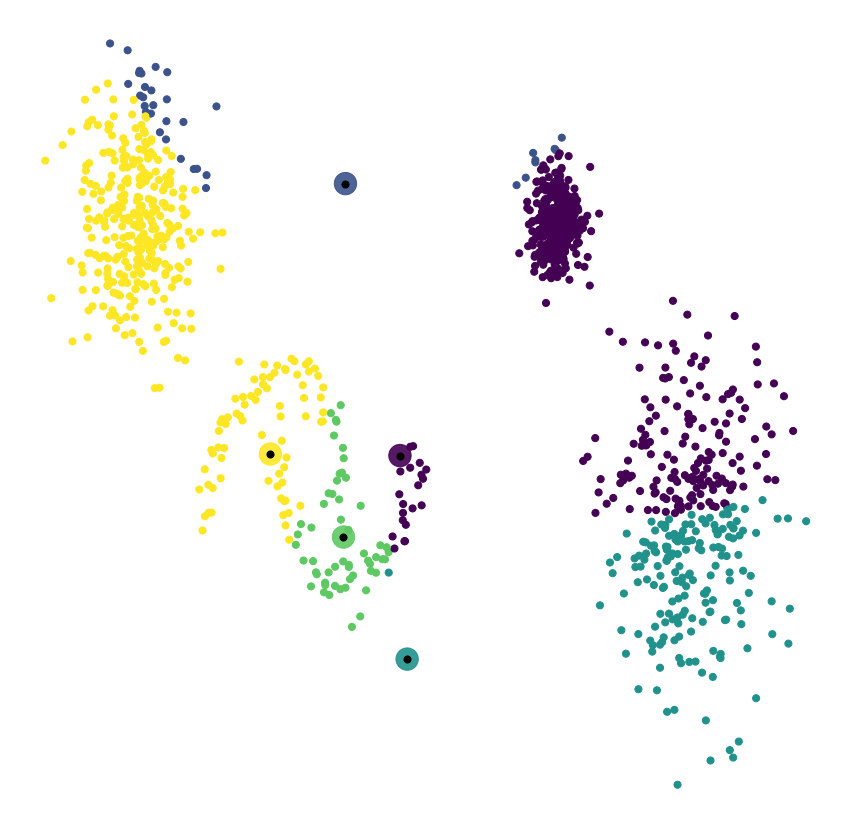

In [5]:
_kmeans_step(1,5)

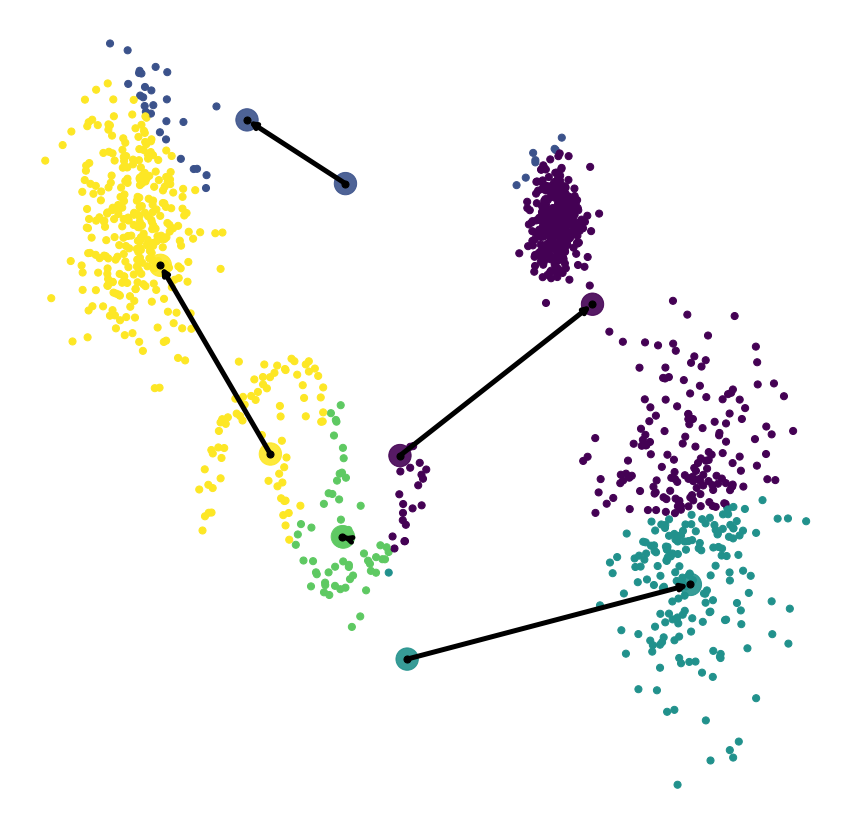

In [6]:
_kmeans_step(2,5)

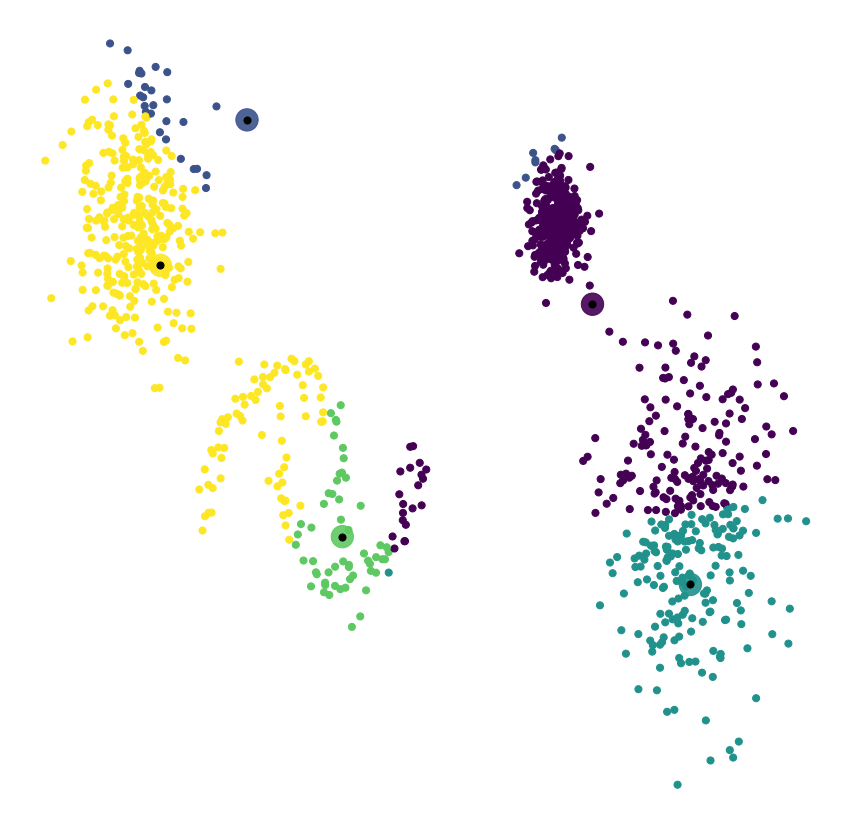

In [7]:
_kmeans_step(3,5)

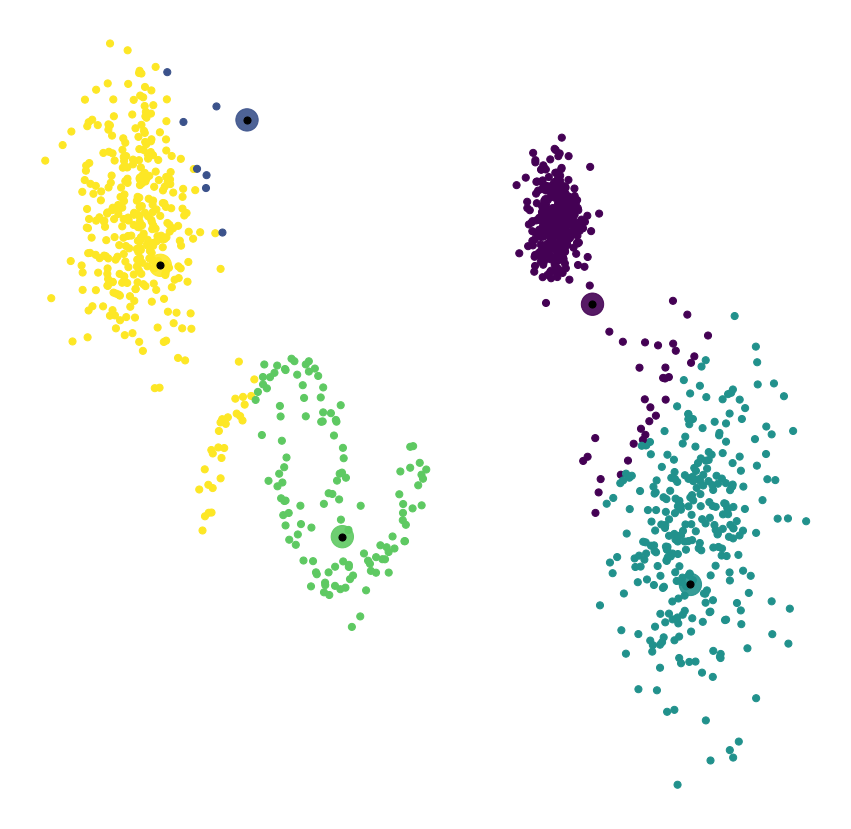

In [8]:
_kmeans_step(4,5)

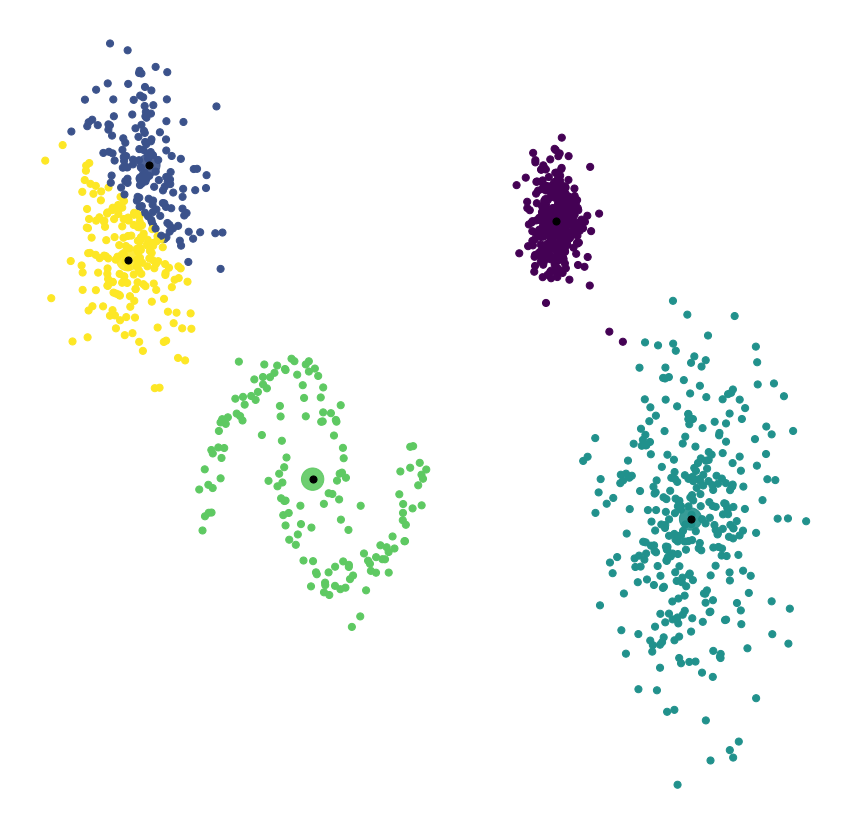

In [9]:
_kmeans_step(1000,5)

# DBSCAN

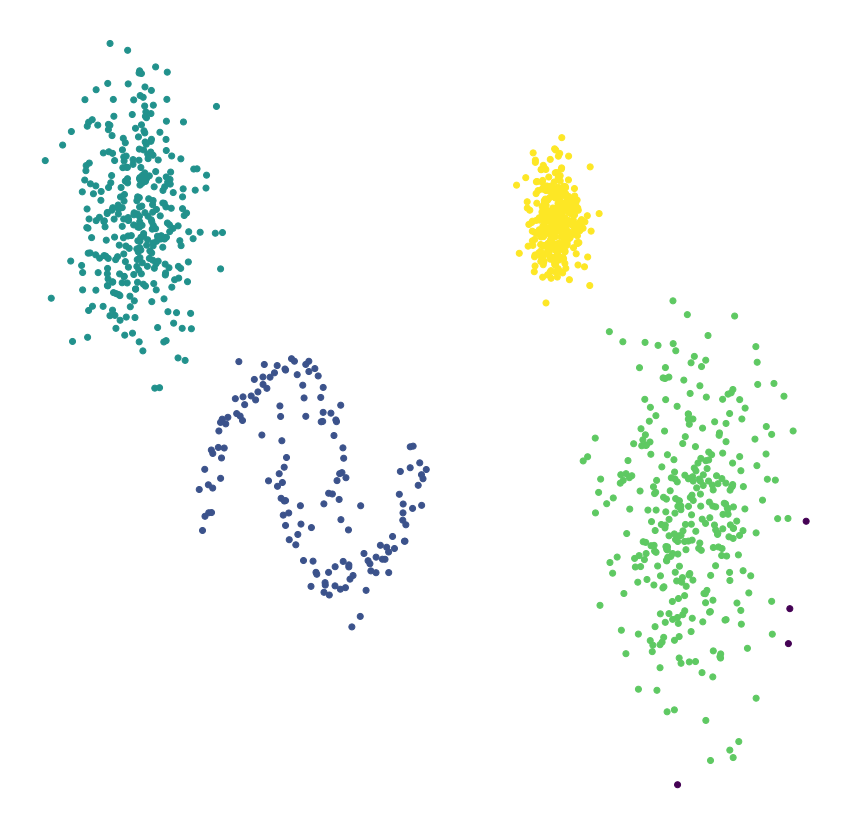

In [10]:
import hdbscan
scan = hdbscan.HDBSCAN()
scan.fit(X)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=scan.labels_)
plt.axis('off')
plt.savefig('IMAGES/DBSCAN.png')
plt.show()

# Mafia

In [11]:
pd.DataFrame(X).to_csv("Results/example.dat", sep = " ",header=False, index=False)

In [12]:
import os

test = np.arange(0,len(X))
rows = []
clusters = []
directory = 'Results'
for filename in os.listdir(directory):
    if filename.endswith(".idx"):
        loadedrow = pd.read_table(f"{directory}/{filename}",sep="  ", header=None, engine='python').values.tolist()
        clusters.extend(np.repeat(int(filename.split('-')[1].replace('.idx','')), len(loadedrow)))
        rows.extend(loadedrow)
        
rows = np.array(rows).ravel()
        
clusters = np.array(clusters)

for x in test:
    if x not in rows:
        rows = np.append(rows, x)
        clusters = np.append(clusters, -1)

In [13]:
rows_to_cluster = pd.DataFrame(clusters, index=rows)

In [14]:
rows_to_cluster = rows_to_cluster[~rows_to_cluster.index.duplicated(keep='last')]
rows_to_cluster = rows_to_cluster.sort_index()

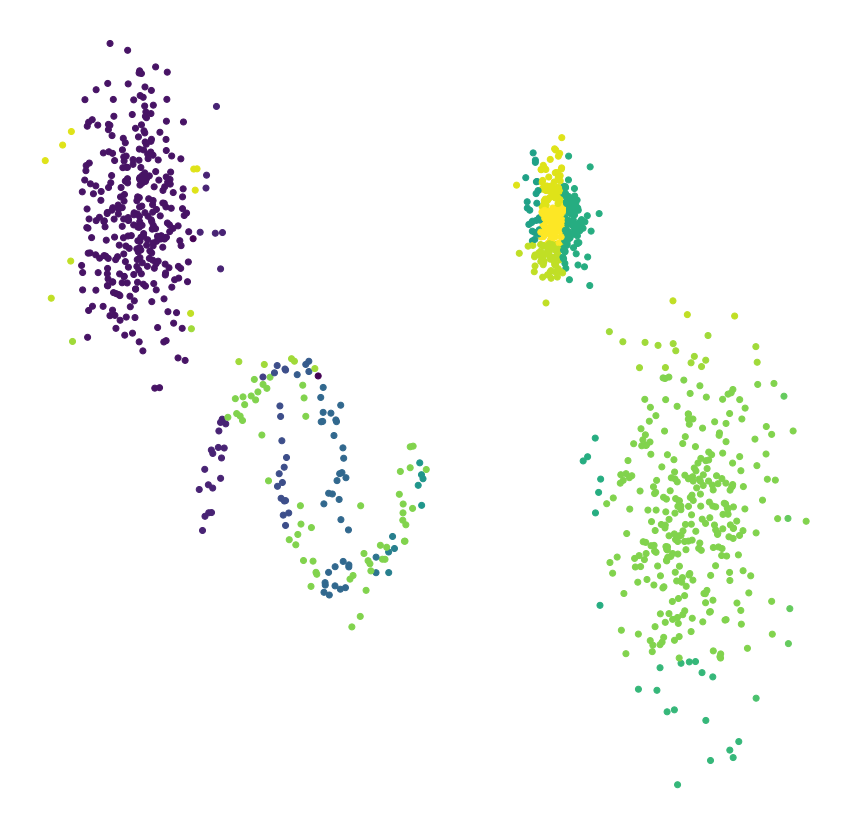

In [15]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=rows_to_cluster.values)
plt.axis('off')
plt.savefig('IMAGES/MAFIA.png')
plt.show()

# HDDC

/data/g0017139/.envs/ClusterEnv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


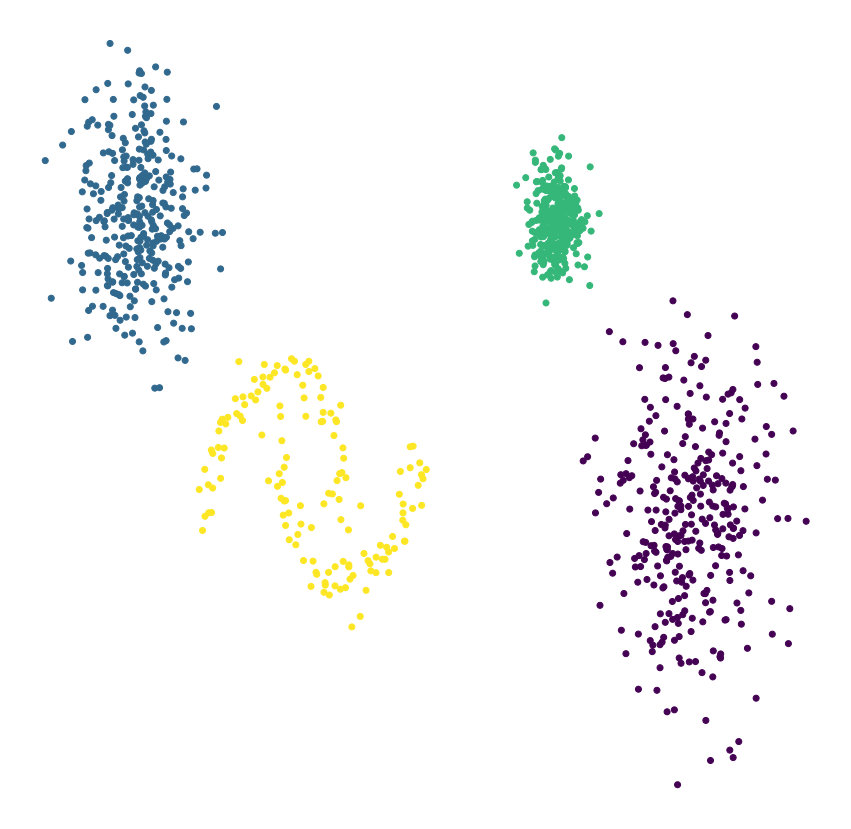

In [16]:
from HDDA import hdda
model = hdda.HDDC()
model.fit(X)
yp=model.predict(X)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=yp)
plt.axis('off')
plt.savefig('IMAGES/HDDC.png')
plt.show()

In [21]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt# Hierachical clustering

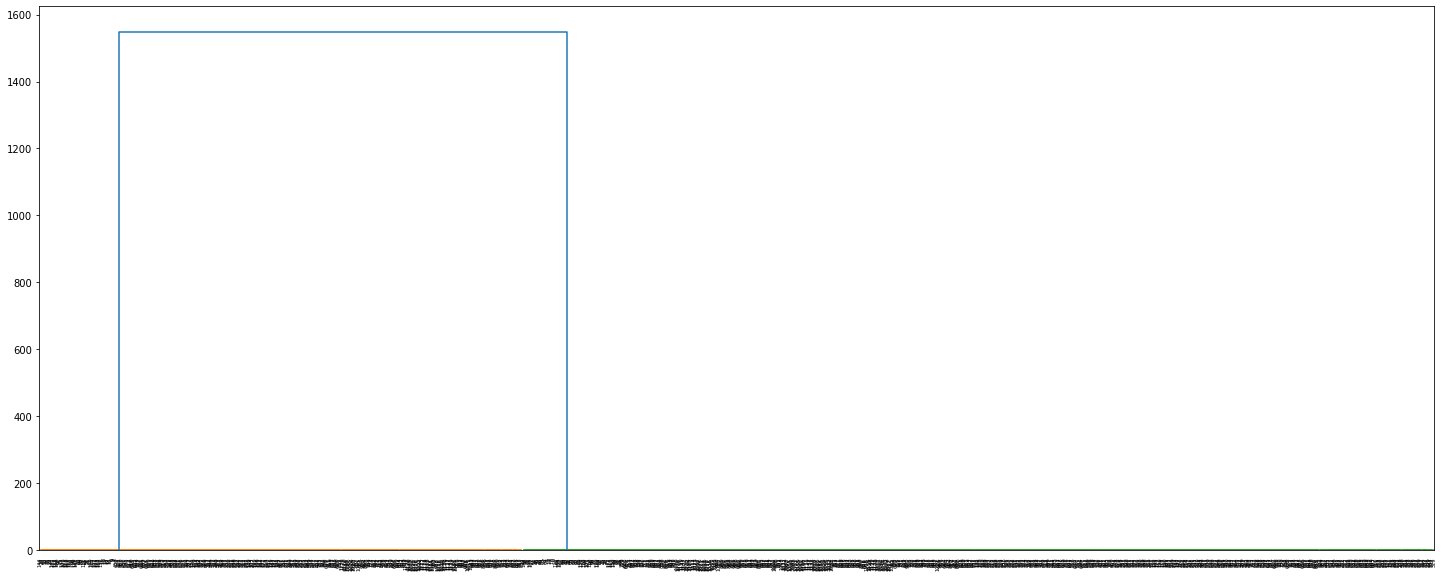

In [33]:
corr = pd.DataFrame(X).T.corr().values
Z = hierarchy.linkage(corr, 'ward', 'euclidean', False)

plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)
plt.show()

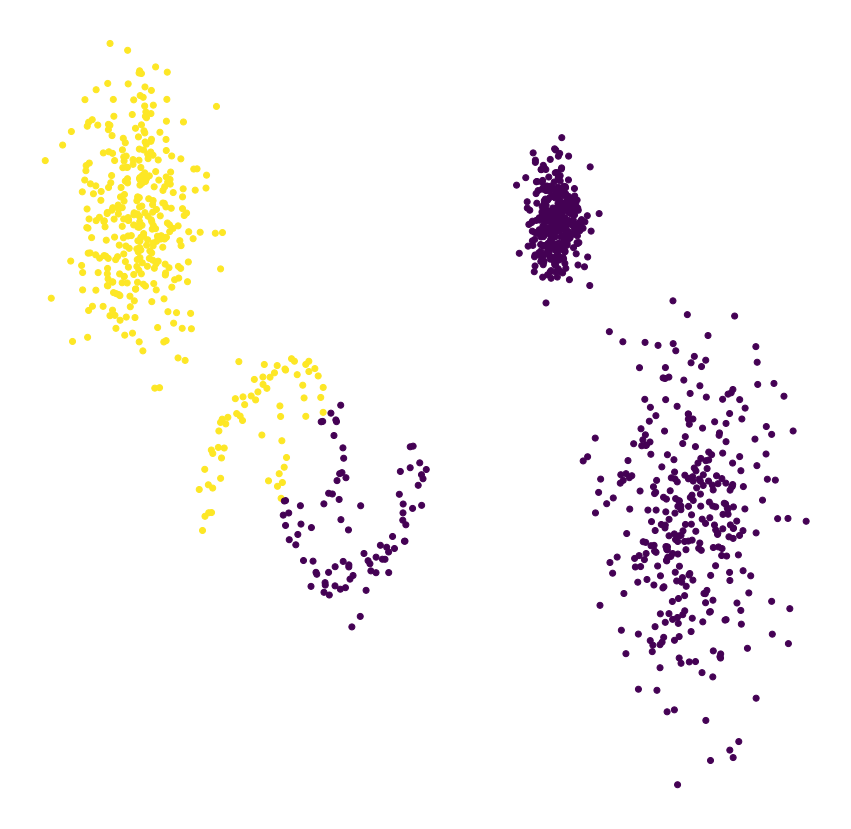

In [46]:
from sklearn.cluster import AgglomerativeClustering
corr = 1 - pd.DataFrame(X).T.corr().values
clustering = AgglomerativeClustering(2, affinity ='euclidean',linkage='ward').fit(corr)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=clustering.labels_)
plt.axis('off')
plt.savefig('IMAGES/Hierachical.png')
plt.show()

# SOM

{'icoord': [[5.0, 5.0, 15.0, 15.0]],
 'dcoord': [[0.0, 2.1134472243079476, 2.1134472243079476, 0.0]],
 'ivl': ['0', '1'],
 'leaves': [0, 1],
 'color_list': ['C0'],
 'leaves_color_list': ['C0', 'C0']}

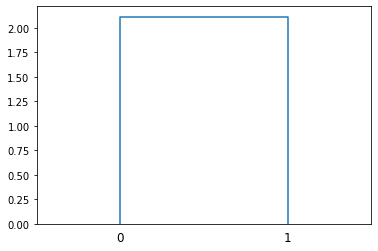

In [17]:
import scipy.cluster.hierarchy as spc
import scipy
corr = pd.DataFrame(X).corr().values
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='euclidean', optimal_ordering=True)
dendrogram(linkage, color_threshold=0)

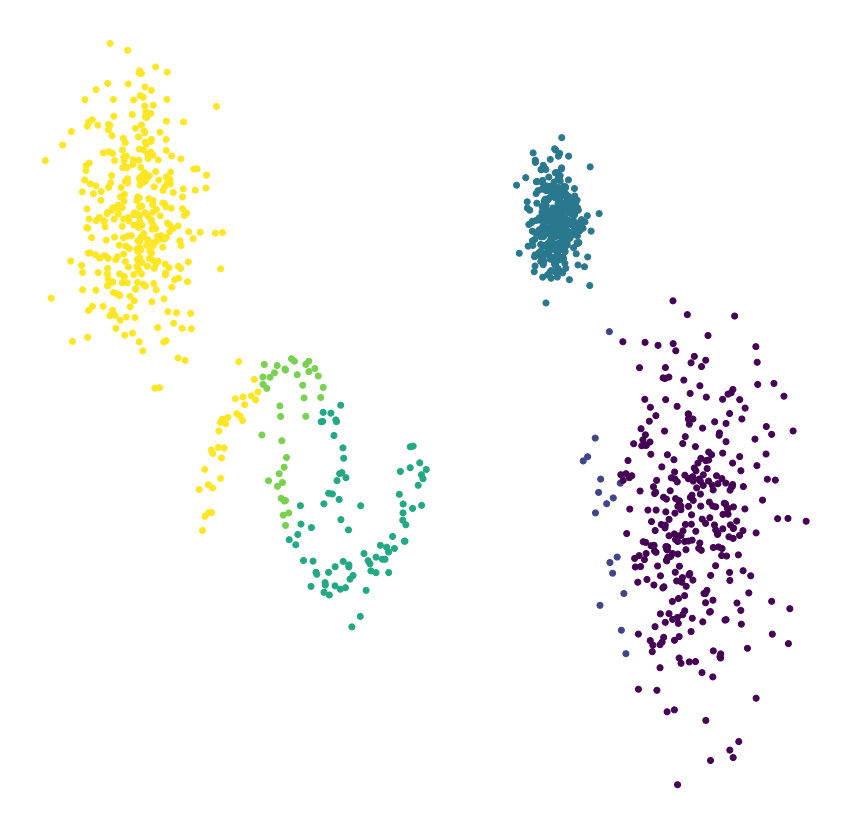

In [18]:
from sklearn_som.som import SOM

model = SOM(m=3, n=2, dim=2)
model.fit(X)
yp=model.predict(X)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=yp)
plt.axis('off')
plt.savefig('IMAGES/SOM.png')
plt.show()

# Explore data

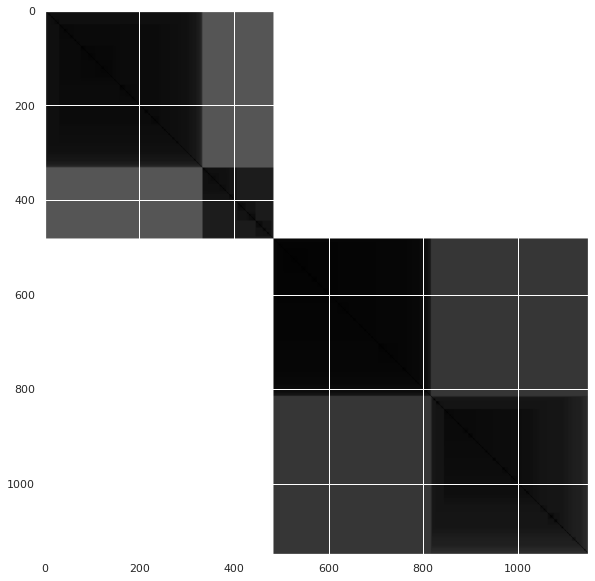

In [19]:
from pyclustertend import ivat
ivat(X)

In [20]:
from pyclustertend import hopkins
hopkins(X,1150)

0.08606011387391084

# Enhanced soft subspace clustering

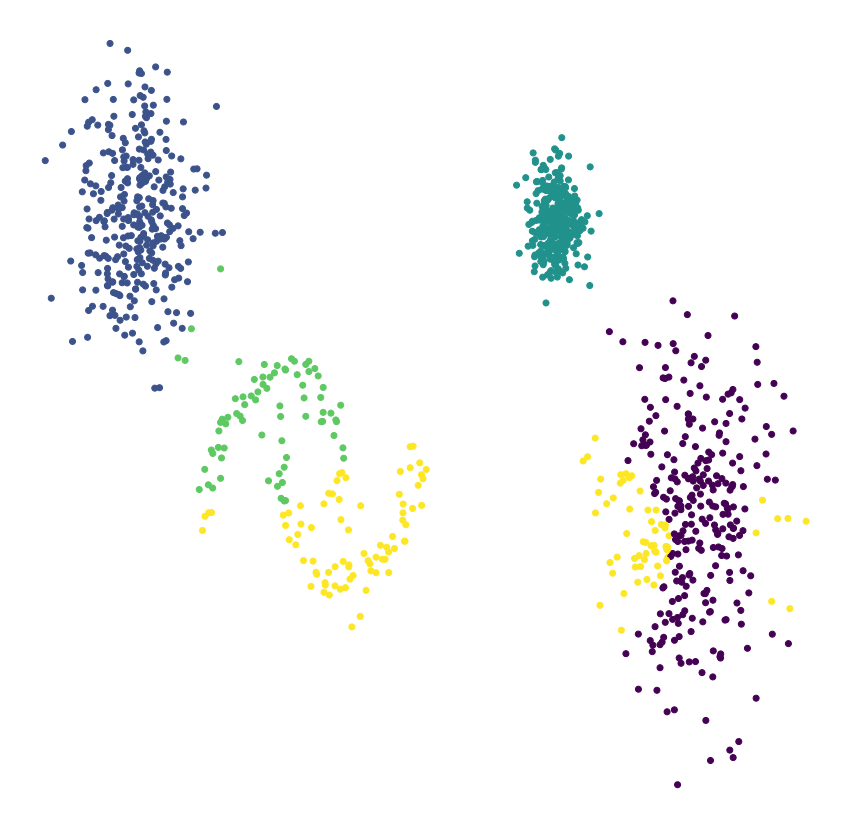

In [10]:
from Gridsearch.TSKFS.fuzzy_cluster import ESSC
essc = ESSC(5)
essc.fit(X)
yp=essc.predict(X)
yp = [np.argmax(q) for  q in yp]
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=yp)
plt.axis('off')
plt.savefig('IMAGES/essc.png')
plt.show()

# Scalable Elastic Net Subspace Clustering

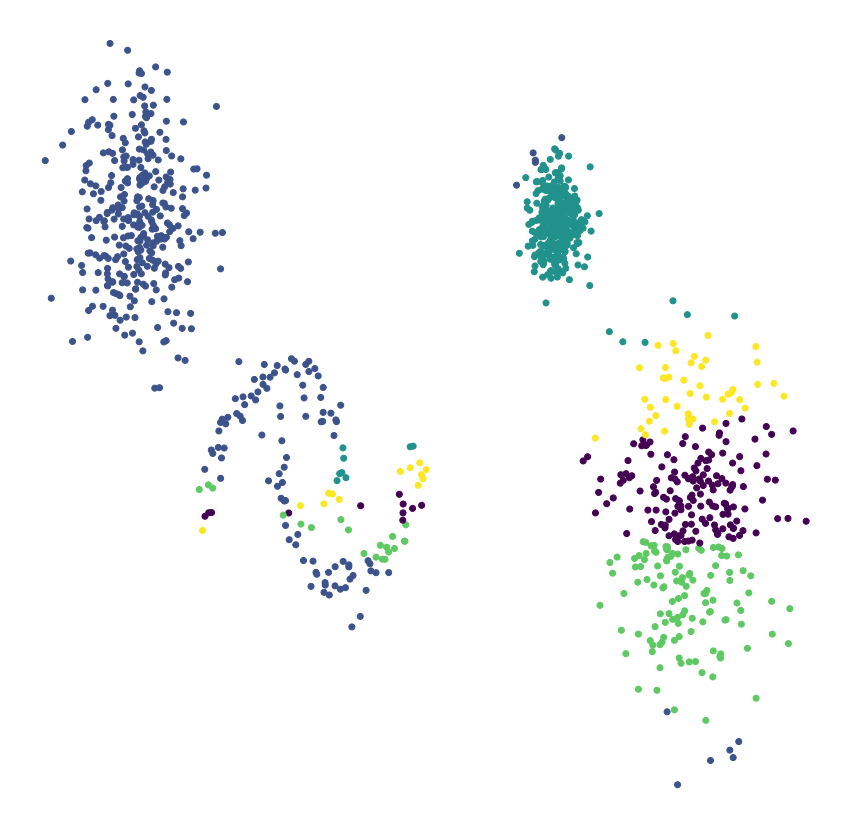

In [34]:
from Gridsearch.subspaceClustering.cluster.selfrepresentation import ElasticNetSubspaceClustering
ensc = ElasticNetSubspaceClustering(n_clusters=5)
ensc.fit(X)
fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1],cmap='viridis', c=ensc.labels_)
plt.axis('off')
plt.savefig('IMAGES/ensc.png')
plt.show()

In [49]:
essc.__dict__

{'n_cluster': 5,
 'm': 2,
 'scale': 1.0,
 'eta': 0.1,
 'gamma': 0.1,
 'error': 1e-05,
 'tol_iter': 50,
 'n_dim': 2,
 'verbose': 0,
 'fitted': True,
 'init_method': 'kmean',
 'sparse_thres': 0.0,
 'U': array([[3.95538933e-08, 2.12202869e-08, 2.92936324e-08, ...,
         2.64008797e-07, 3.75906029e-07, 1.38165736e-08],
        [1.08458567e-07, 2.76787561e-06, 2.18725199e-07, ...,
         2.62162167e-08, 2.48804367e-08, 9.99999627e-01],
        [1.10591463e-07, 4.21614400e-08, 6.81747433e-08, ...,
         9.99999400e-01, 9.99999353e-01, 2.38368900e-08],
        [6.80161349e-07, 9.99994983e-01, 9.99999011e-01, ...,
         5.29219874e-08, 4.86886755e-08, 2.06787335e-07],
        [9.99999061e-01, 2.18544748e-06, 6.72718772e-07, ...,
         2.56720076e-07, 1.97923514e-07, 1.28677810e-07]], dtype=float128),
 'weight_': array([[1.00000000e+000, 2.18928798e-320],
        [1.00000000e+000, 2.18928798e-320],
        [1.00000000e+000, 3.55805116e-296],
        [1.00000000e+000, 4.97693828e-1